In [17]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy.special import expit

In [89]:
# Load CSV file into a DataFrame
df = pd.read_csv('data/cumulative-area-burnt-by-wildfires-by-week.csv')
for i in range(0,13):
#     print('Y'+str(2024-i))
    df['Y'+str(2024-i)+'_Cumulative_Area_Burnt'].fillna(0, inplace=True)

# Display the first few rows of the DataFrame
print(df.head())


        Entity Code  Week  Y2024_Cumulative_Area_Burnt  \
0  Afghanistan  AFG     1                        391.0   
1  Afghanistan  AFG     2                        559.0   
2  Afghanistan  AFG     3                        841.0   
3  Afghanistan  AFG     4                        841.0   
4  Afghanistan  AFG     5                        841.0   

   Y2023_Cumulative_Area_Burnt  Y2022_Cumulative_Area_Burnt  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                          215   

   Y2021_Cumulative_Area_Burnt  Y2020_Cumulative_Area_Burnt  \
0                         1246                            0   
1                         2680                          963   
2                         3539                         1181   
3                   

In [90]:
for i in range(1,13):
    df['Y'+str(2024-i)+'_Weekly_Area_Burnt'] = df['Y'+str(2024-i)+'_Cumulative_Area_Burnt'].diff().fillna(df['Y'+str(2024-i)+'_Cumulative_Area_Burnt'])
    
    

In [91]:
total_Cumulative_Area_Burnt=0
total_Weekly_Area_Burnt=0
for i in range(0,13):
    total_Cumulative_Area_Burnt=total_Cumulative_Area_Burnt+df['Y'+str(2024-i)+'_Cumulative_Area_Burnt']
    
for i in range(1,13):
    total_Weekly_Area_Burnt=total_Weekly_Area_Burnt+df['Y'+str(2024-i)+'_Weekly_Area_Burnt']
    
    
df['Total_Cumulative_Area_Burnt']=total_Cumulative_Area_Burnt
df['Avg_Cumulative_Area_Burnt']=df['Total_Cumulative_Area_Burnt']/(12*1000000)
df['Total_Weekly_Area_Burnt']=total_Weekly_Area_Burnt
df['Avg_Weekly_Area_Burnt']=df['Total_Weekly_Area_Burnt']/(13*1000000)

# df['Total']=df['Y2024']+df['Y2023']+df['Y2022']+df['Y2021']+df['Y2020']+df['Y2019']+df['Y2018']+df['Y2017']+df['Y2016']+df['Y2015']+df['Y2014']
# df['Y2013']+df['Y2012']
# df['Avg']=df['Total']/(13*1000000)
# df['Total'].fillna(0, inplace=True)
# df['Avg'].fillna(0, inplace=True)
print(df)

            Entity Code  Week  Y2024_Cumulative_Area_Burnt  \
0      Afghanistan  AFG     1                        391.0   
1      Afghanistan  AFG     2                        559.0   
2      Afghanistan  AFG     3                        841.0   
3      Afghanistan  AFG     4                        841.0   
4      Afghanistan  AFG     5                        841.0   
...            ...  ...   ...                          ...   
13411     Zimbabwe  ZWE    48                          0.0   
13412     Zimbabwe  ZWE    49                          0.0   
13413     Zimbabwe  ZWE    50                          0.0   
13414     Zimbabwe  ZWE    51                          0.0   
13415     Zimbabwe  ZWE    52                          0.0   

       Y2023_Cumulative_Area_Burnt  Y2022_Cumulative_Area_Burnt  \
0                                0                            0   
1                                0                            0   
2                                0                    

In [92]:
code = 'OWID_WRL'  # Replace 'AFG' with the code you want to filter by
filtered_df = df[df['Code'] == code]
print(filtered_df)



      Entity      Code  Week  Y2024_Cumulative_Area_Burnt  \
13208  World  OWID_WRL     1                    7706102.0   
13209  World  OWID_WRL     2                   16405835.0   
13210  World  OWID_WRL     3                   25033458.0   
13211  World  OWID_WRL     4                   33018512.0   
13212  World  OWID_WRL     5                   39035740.0   
13213  World  OWID_WRL     6                   45517076.0   
13214  World  OWID_WRL     7                   51166384.0   
13215  World  OWID_WRL     8                   57281930.0   
13216  World  OWID_WRL     9                   68291704.0   
13217  World  OWID_WRL    10                   79310910.0   
13218  World  OWID_WRL    11                   87835110.0   
13219  World  OWID_WRL    12                   89475080.0   
13220  World  OWID_WRL    13                   89475080.0   
13221  World  OWID_WRL    14                   89475080.0   
13222  World  OWID_WRL    15                          0.0   
13223  World  OWID_WRL  

In [93]:
filtered_df.Avg_Weekly_Area_Burnt

13208     7.432312
13209     7.176517
13210     6.639746
13211     6.796666
13212     6.364205
13213     5.988416
13214     5.131555
13215     4.904957
13216     4.906196
13217     5.147358
13218     5.521620
13219     5.840684
13220     6.010489
13221     5.473898
13222     5.747661
13223     5.274650
13224     4.746488
13225     4.215746
13226     4.213780
13227     3.942954
13228     4.298985
13229     4.668856
13230     6.064634
13231     6.597518
13232     6.822990
13233     7.431399
13234     8.354998
13235     9.086764
13236     9.546416
13237    10.094291
13238    10.596798
13239    11.037602
13240    11.550000
13241    11.459118
13242    11.706252
13243    12.393300
13244    12.150341
13245    10.206588
13246     8.392559
13247     7.585147
13248     7.579979
13249     7.075248
13250     6.606335
13251     6.101288
13252     5.583311
13253     5.094058
13254     4.811684
13255     5.209665
13256     6.198018
13257     7.533812
13258     8.004115
13259     7.719573
Name: Avg_We

In [94]:
Avg_Weekly_Area_Burnt_mean = filtered_df.Avg_Weekly_Area_Burnt.mean()
Avg_Weekly_Area_Burnt_std = filtered_df.Avg_Weekly_Area_Burnt.std()
Avg_Weekly_Area_Burnt_mean,Avg_Weekly_Area_Burnt_std

(7.096875744082841, 2.309931416811633)

In [120]:
Avg_Cumulative_Area_Burnt_mean=filtered_df.Avg_Cumulative_Area_Burnt.mean()
Avg_Cumulative_Area_Burnt_std=filtered_df.Avg_Cumulative_Area_Burnt.std()
Avg_Cumulative_Area_Burnt_mean,Avg_Cumulative_Area_Burnt_std

(192.4319444679487, 120.79527854059384)

<AxesSubplot:>

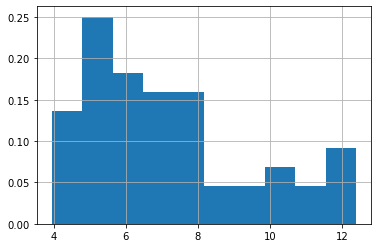

In [121]:
filtered_df.Avg_Weekly_Area_Burnt.hist(density=True)

<AxesSubplot:>

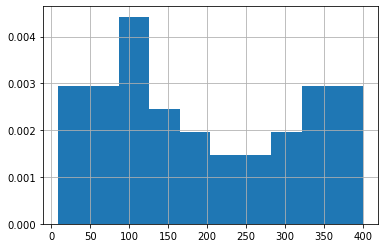

In [122]:
filtered_df.Avg_Cumulative_Area_Burnt.hist(density=True)

In [123]:
#per year per week the prob of area burning btw (200-250) is <0.002, (80,120)>0.004

In [124]:
Avg_Weekly_Area_Burnt_alpha_mom = Avg_Weekly_Area_Burnt_mean ** 2 / Avg_Weekly_Area_Burnt_std
Avg_Weekly_Area_Burnt_beta_mom = Avg_Weekly_Area_Burnt_std / Avg_Weekly_Area_Burnt_mean
Avg_Weekly_Area_Burnt_alpha_mom, Avg_Weekly_Area_Burnt_beta_mom

(21.803957018113724, 0.32548567850262605)

In [125]:
Avg_Cumulative_Area_Burnt_alpha_mom = Avg_Cumulative_Area_Burnt_mean ** 2 / Avg_Cumulative_Area_Burnt_std
Avg_Cumulative_Area_Burnt_beta_mom = Avg_Cumulative_Area_Burnt_std / Avg_Cumulative_Area_Burnt_mean
Avg_Cumulative_Area_Burnt_alpha_mom, Avg_Cumulative_Area_Burnt_beta_mom

(306.552157494066, 0.6277298650937521)

2.2876127154619375


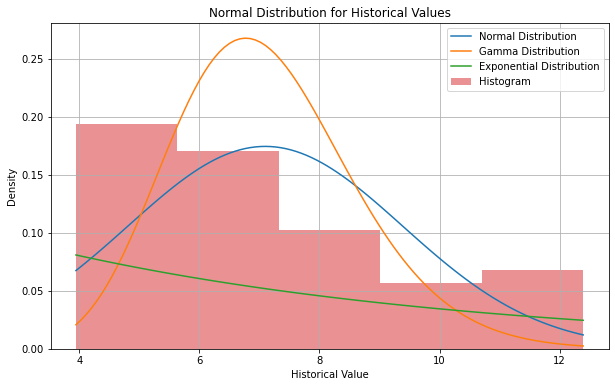

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,gamma,expon

# Historical values
historical_values = filtered_df.Avg_Weekly_Area_Burnt

# Calculate mean and standard deviation
mean = np.mean(historical_values)
std_dev = np.std(historical_values)
print(std_dev)
# Generate data for the normal distribution curve
x = np.linspace(min(historical_values), max(historical_values), 100)
y = norm.pdf(x, mean, std_dev)
y1=gamma.pdf(x, a=Avg_Weekly_Area_Burnt_alpha_mom, scale=Avg_Weekly_Area_Burnt_beta_mom)
# y2=poisson.pmf(x, mean)
y2 = expon.pdf(x, scale=mean)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
plt.plot(x, y1, label='Gamma Distribution')
plt.plot(x, y2, label='Exponential Distribution')
plt.hist(historical_values, bins=5, density=True, alpha=0.5, label='Histogram')
plt.title('Normal Distribution for Historical Values')
plt.xlabel('Historical Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


119.62814702899165


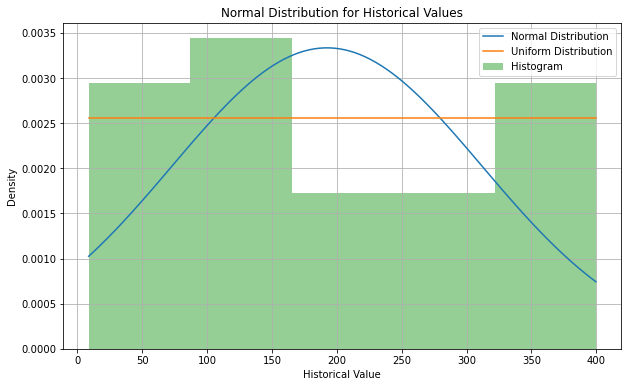

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,gamma,uniform

# Historical values
historical_values = filtered_df.Avg_Cumulative_Area_Burnt

# Calculate mean and standard deviation
mean = np.mean(historical_values)
std_dev = np.std(historical_values)
print(std_dev)
# Generate data for the normal distribution curve
x = np.linspace(min(historical_values), max(historical_values), 100)
y = norm.pdf(x, mean, std_dev)
# y1=gamma.pdf(x, a=Avg_Cumulative_Area_Burnt_alpha_mom, scale=Avg_Cumulative_Area_Burnt_beta_mom)
y2 = uniform.pdf(x,loc=min(historical_values), scale=max(historical_values)-min(historical_values))
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
# plt.plot(x, y1, label='Gamma Distribution')
plt.plot(x, y2, label='Uniform Distribution')
plt.hist(historical_values, bins=5, density=True, alpha=0.5, label='Histogram')
plt.title('Normal Distribution for Historical Values')
plt.xlabel('Historical Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


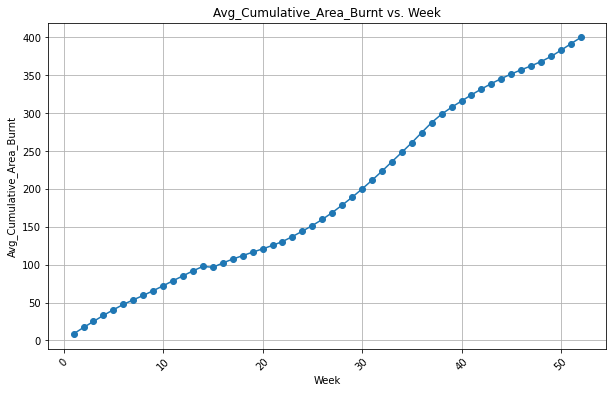

In [133]:
import matplotlib.pyplot as plt

# Assuming 'Week' and 'Total' are columns in your DataFrame, and it is named 'df'
# You may need to adjust column names accordingly
# Also assuming df is sorted by week

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Week'], filtered_df['Avg_Cumulative_Area_Burnt'], marker='o', linestyle='-')
plt.title('Avg_Cumulative_Area_Burnt vs. Week')
plt.xlabel('Week')
plt.ylabel('Avg_Cumulative_Area_Burnt')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()
